# Model Uncertainty

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Times New Roman"]})
plt.rcParams["font.family"] = "Times New Roman"

save_figures = False

1. Model error - linear elasticity
2. Input error - noise in the strain
3. Output error - noise in the experimental observations (stress)

### Statistical generating model

No model is completely correct and model uncertainty as an error source can be incorporated. A framework able to do so was developed by Kennedy and O'Hagan [[1]( https://doi.org/10.1111/1467-9868.00294)]

$$\sigma_{observed} = \sigma_{true} + \Omega$$

with

$$\sigma_{true} = \sigma_{model}(\epsilon, \textbf{x}) + d(\epsilon)$$

where $\Omega$ is the error in the stress measurement and $d$ denotes the model uncertainty which is assumed to be dependent on the input (i.e. strain $\epsilon$).

### Likelihood

$$\pi(y|\textbf{x}, \textbf{x}_d, \textbf{x}_{\Omega}) = \pi_{\Omega}(y - \sigma_{model}(\epsilon, \textbf{x}) - d(\epsilon))$$

In [2]:
def compute_stress(epsilon, E=210):
    """
    Linear elastic material model
    """
    return epsilon * E

In [3]:
def true_process(epsilon, E=210, alpha=0.015):
    return (epsilon * E) / (1 + (epsilon / alpha))

In [4]:
def generate_synthetic_data(x, n_data_points, func, s_noise=0.01, seed=None):
    np.random.seed(seed)
    x_subset = np.random.choice(x, n_data_points)
    y = np.zeros(n_data_points)

    for i in range(n_data_points):
        y[i] = func(x_subset[i]) + (s_noise * np.random.normal())

    return x_subset, y

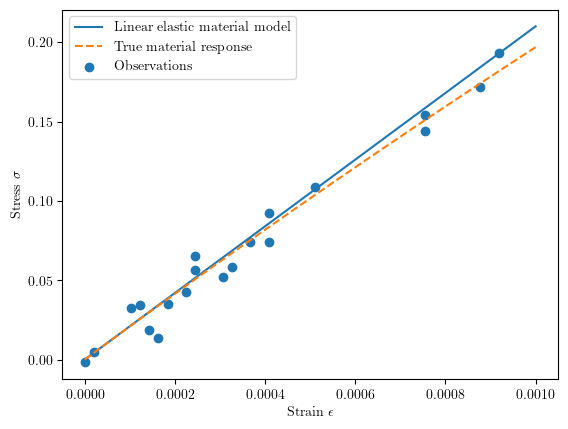

In [5]:
x = np.linspace(0, 1e-3)
model = compute_stress(x)
true = true_process(x)
x_observations, y_observations = generate_synthetic_data(np.linspace(0, 1e-3), 20, true_process, s_noise=0.01, seed=1)

plt.plot(x, model, label='Linear elastic material model')
plt.plot(x, true, label='True material response', linestyle='--')
plt.scatter(x_observations, y_observations, label='Observations');
plt.xlabel("Strain $\epsilon$");
plt.ylabel("Stress $\sigma$");
plt.legend();

## Gaussian process with a stationary covariance function

## References

[1] Kennedy, M. C., & O'Hagan, A. (2001). Bayesian calibration of computer models. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 63(3), 425-464.